In [124]:
import os.path as op
import os
import pandas as pd
import glob
import scipy.stats
import pickle
import numpy as np
import math
os.chdir('../')
import datastruct
import seaborn as sns
import matplotlib.pyplot as plt
import moss
from itertools import groupby  
import statsmodels.api as sm
from psychopy import data, gui, core
from psychopy.tools.filetools import fromFile
import pylab
import math
import statsmodels.formula.api as smf
import arviz
%matplotlib inline

In [125]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [126]:
#r stuff for Anovas
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects import r
base = importr('base')
afex = importr('afex') 

In [127]:
df = pd.read_csv('all_data_clean.csv')


sns.set_context('talk')

simulation_dir = op.join('/Users/ianballard/Dropbox/rule_habit/paper/simulations/')


In [128]:
df['Trial Type'] = df['reward_block']

In [8]:
final_model = 'avt'
sim_df = []
for block in ['test','reward']:
    
    sim =  pd.read_csv(op.join(simulation_dir,
                     final_model + '_' + block + '.csv'))
    sim['block'] = block
    sim_df.append(sim.copy())
sim_df = pd.concat(sim_df)
sim_df = sim_df.rename(columns = {'rt_positive_sampled':'Reaction Time',
                            'accuracy_sampled':'correct_bin'})

#make some columns
tt_map = {'rewarded':'rewarded rule','compete':'competing rule','noncompete':'noncompeting rule'}

sim_df['Trial Type'] = [tt_map[x] for x in sim_df['miniblock_type']]

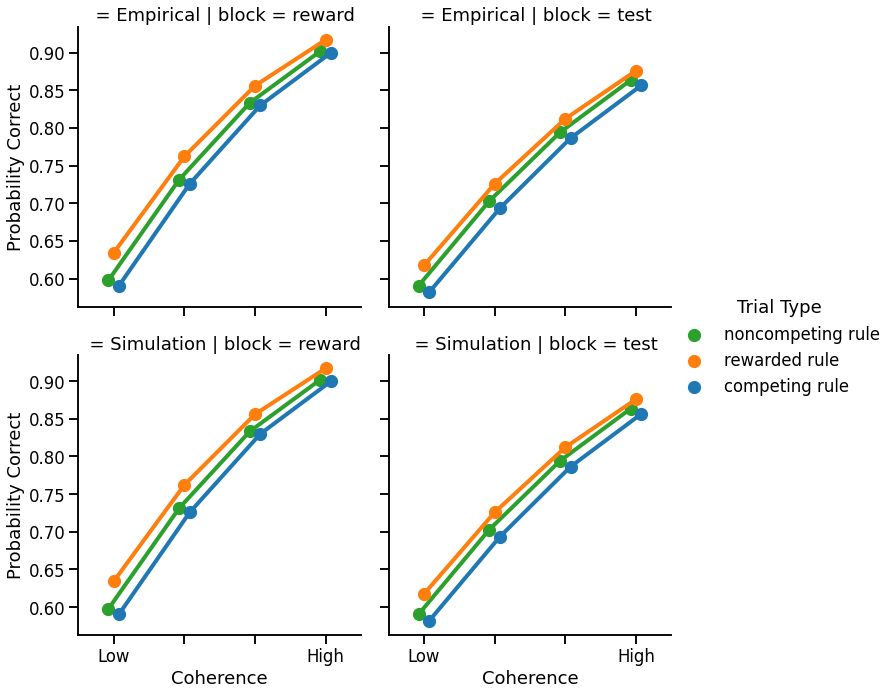

In [60]:

sim_df['Probability Correct'] = sim_df['correct_bin']


coherence_map = {0.0:'Low',1.0:' ',2.0:'  ',3.0:'High'}
sim_df['Coherence'] = [coherence_map[x] for x in sim_df['coherence_bin']]

fig_df1 = sim_df.copy()
fig_df2 = sim_df.copy()

fig_df1['Reaction Time'] = fig_df1['rt_positive']
fig_df1[' '] = 'Empirical'
fig_df2[' '] = 'Simulation'

fig_df = pd.concat([fig_df1,
                  fig_df2])

sns.catplot(
        x="Coherence",
           y="Probability Correct",
                col = 'block',
    col_order = ['reward','test'],
           hue = "Trial Type",
    row = ' ',
        hue_order = ['noncompeting rule','rewarded rule','competing rule'],
        palette = [sns.color_palette(as_cmap = True)[2],
                    sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
    order = ['Low',' ','  ','High'],
            kind = 'point',
            dodge = .15,
    ci = 68,
           data=fig_df)

plt.savefig(op.abspath('./paper/figs/rule_hab_minibloc_acc_similation.png'), dpi = 300)

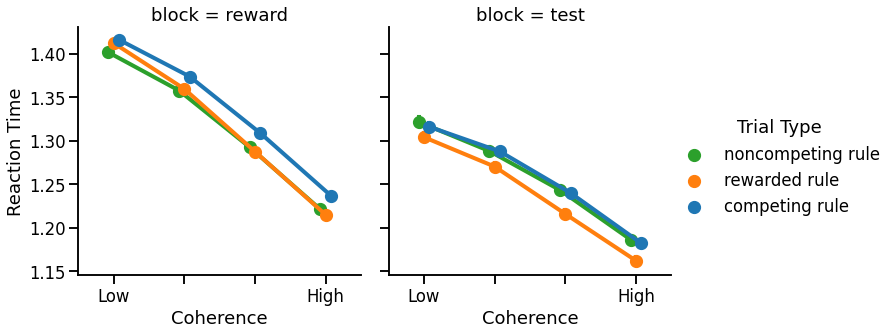

In [40]:
sns.catplot(
        x="Coherence",
           y="Reaction Time",
                col = 'block',
    col_order = ['reward','test'],
           hue = "Trial Type",
        hue_order = ['noncompeting rule','rewarded rule','competing rule'],
    order = ['Low',' ','  ','High'],
            palette = [sns.color_palette(as_cmap = True)[2],
                    sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
            kind = 'point',
            dodge = .15,
    ci = 68,
           data=sim_df)
plt.savefig(op.abspath('./paper/figs/rule_hab_minibloc_rt_similation.png'), dpi = 300)

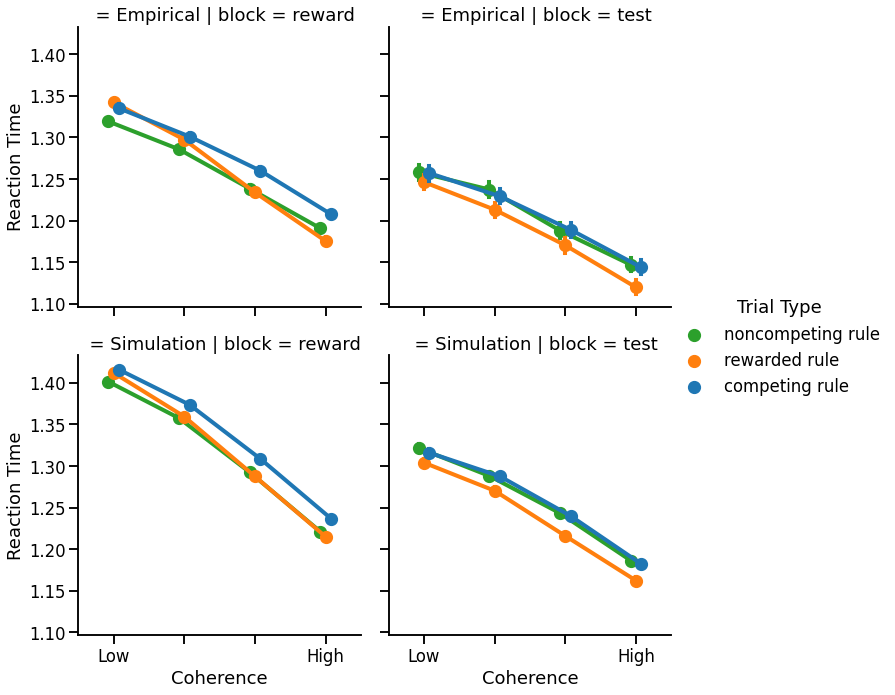

In [59]:
fig_df1 = sim_df.copy()
fig_df2 = sim_df.copy()

fig_df1['Reaction Time'] = fig_df1['rt_positive']
fig_df1[' '] = 'Empirical'
fig_df2[' '] = 'Simulation'

fig_df = pd.concat([fig_df1,
                  fig_df2])

g = sns.catplot(
        x="Coherence",
           y="Reaction Time",
                col = 'block',
    col_order = ['reward','test'],
           hue = "Trial Type",
        hue_order = ['noncompeting rule','rewarded rule','competing rule'],
    order = ['Low',' ','  ','High'],
            palette = [sns.color_palette(as_cmap = True)[2],
                    sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
            kind = 'point',
            dodge = .15,
    ci = 68,
    row = ' ',
           data=fig_df)

plt.savefig(op.abspath('./paper/figs/rule_hab_minibloc_rt_similation.png'), dpi = 300)

## Model comparison

In [107]:
#test
simulation = []
for model in ['avt','vt','av','v','a','t','coherence']:
    
    sim =  pd.read_csv(op.join(simulation_dir,
                     model + '_reward.csv'))
    
    if model == 'av':
        sim['model'] = 'va'
        
    elif model == 'avt':
        
        sim['model'] = 'vta'

    else:
        sim['model'] = model


    
    simulation.append(sim.copy())

    
simulation = pd.concat(simulation)

simulation = simulation.rename(columns = {'rt_positive_sampled':'Reaction Time',
                            'accuracy_sampled':'correct_bin'})

#make some columns
tt_map = {'rewarded':'rewarded rule','compete':'unrewarded rules','noncompete':'unrewarded rules'}

simulation['Trial Type'] = [tt_map[x] for x in simulation['miniblock_type']]



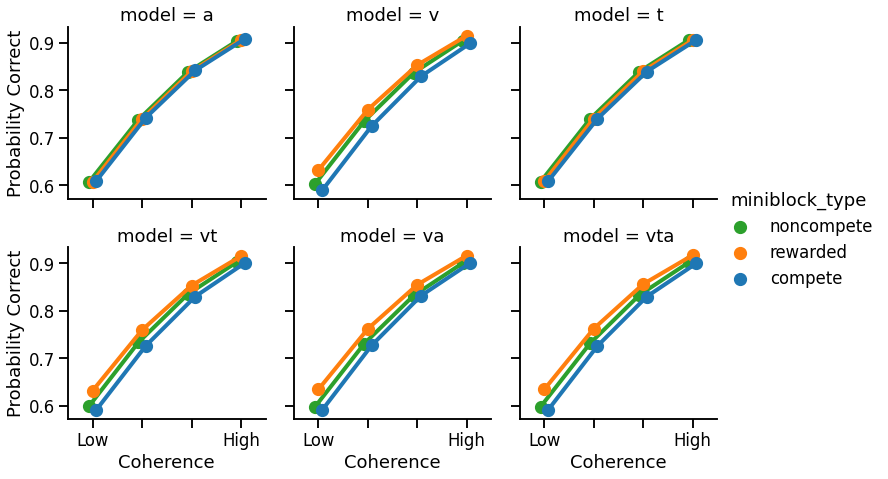

In [120]:
simulation['Probability Correct'] = simulation['correct_bin']

coherence_map = {0.0:'Low',1.0:' ',2.0:'  ',3.0:'High'}
simulation['Coherence'] = [coherence_map[x] for x in simulation['coherence_bin']]

ax = sns.catplot(
        x="Coherence",
           y="Probability Correct",
           hue = "miniblock_type",
                col = 'model',
            hue_order = ['noncompete','rewarded','compete'],
            kind = 'point',
        col_order = ['a','v','t',
                     'vt','va','vta'],
            palette = [sns.color_palette(as_cmap = True)[2],
                    sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
        col_wrap = 3,
    dodge = .15,
    height = 3.5,
    ci = 68,
           data=simulation)
sim_acc_ylim = ax.axes[0].get_ylim()
# plt.savefig(op.abspath('./rule_habit/paper/figs/model_fits_accuracy.png'),
#             bbox_inches = 'tight',
#             dpi = 300)

In [132]:
sim_acc_ylim


(0.5711668628189077, 0.93390166251385)

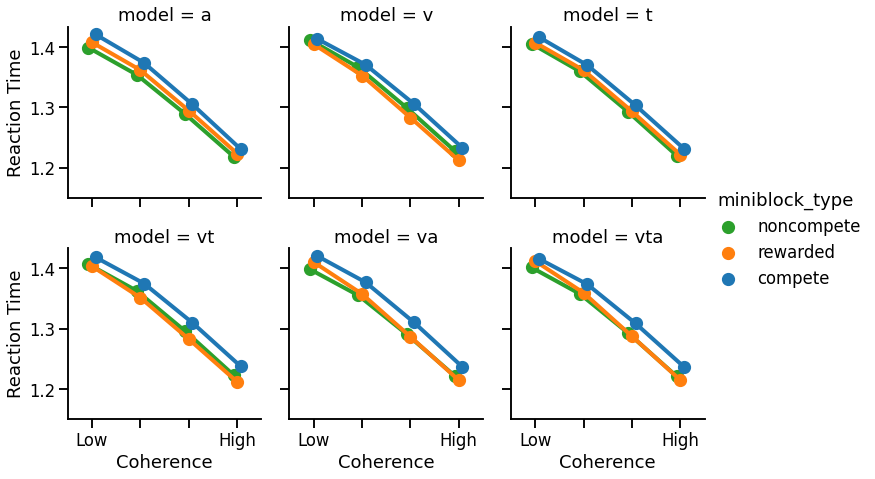

In [135]:
ax = sns.catplot(
        x="Coherence",
           y="Reaction Time",
           hue = "miniblock_type",
                col = 'model',
            
            kind = 'point',
        col_order = ['a','v','t',
                     'vt','va','vta'],
    col_wrap = 3,
                hue_order = ['noncompete','rewarded','compete'],
            dodge = .15,
    height = 3.5,
            palette = [sns.color_palette(as_cmap = True)[2],
                    sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
    ci = 68,
           data=simulation)
ax.set(ylim = (1.15, 1.433672978192678)) ##from simulations

plt.savefig(op.abspath('./rule_habit/paper/figs/model_fits_rt.png'),
            bbox_inches = 'tight',
            dpi = 300)

In [133]:
sim_rt_ylim

(1.199629998616501, 1.433672978192678)

Text(0, 0.5, 'DIC relative\nto baseline model')

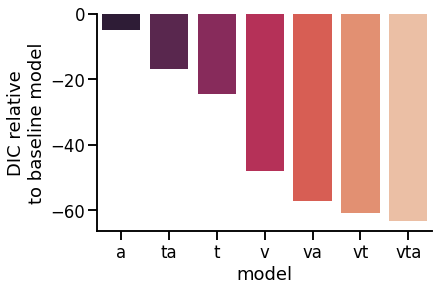

In [15]:
coherence_only = 79458.938896191
DIC_map = { 'a':79454.00584,
                   'va':79401.69389511798,
                   'vta':79395.69829,
                    'ta':79442.05532490782,
                   't':79434.43509941394,
                   'vt':79398.17703627306,
                   'v':79410.9479}

dic = pd.DataFrame({'model':DIC_map.keys(),
                   'DIC':np.array(list(DIC_map.values())) - coherence_only})

dic = dic.sort_values(by = 'DIC', ascending = False,)
ax = sns.barplot(y = 'DIC',
           x = 'model',
                 palette = 'rocket',
           data= dic)
sns.despine()
plt.ylabel('DIC relative\nto baseline model')
# plt.savefig(op.abspath('./paper/figs/DIC.png'),
#             bbox_inches = 'tight',
#             dpi = 300)

## Plot traces

In [61]:
traces_df = []

for block in ['reward','test']:

    traces = pd.read_csv(op.join(simulation_dir,
                                         'traces_' + block + '.csv'))
    traces = traces.melt(value_name = 'Posterior Samples')


    param_map = {'v':'Drift Rate',
                't':'Nondecision Time',
                'a':'Boundary'}

    rule_map = {'rewarded':'rewarded rule',
               'compete':'competing rule'}

    traces['Parameter'] = [param_map[x.split('_')[0]] for x in traces['variable']]

    traces['Condition'] = [rule_map[x.split('_')[1]] for x in traces['variable']]
    
    traces['block'] = block

    traces_df.append(traces.copy())
traces = pd.concat(traces_df).reset_index()

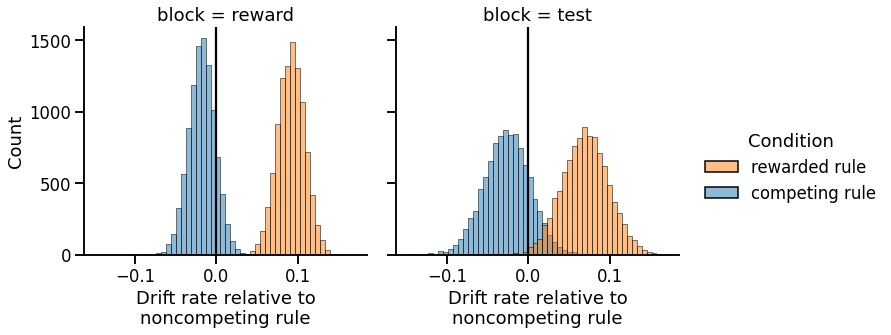

In [62]:
fig_df = traces[traces.Parameter == 'Drift Rate']
fig_df['Drift rate relative to\nnoncompeting rule'] = fig_df['Posterior Samples']
grid = sns.displot(x = 'Drift rate relative to\nnoncompeting rule',
           hue = 'Condition',
            kind = 'hist',
            palette = [sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
            col = 'block',
            data = fig_df)

for ax in grid.axes.flat:
    ax.axvline(0,
              color = 'black')
    
# plt.savefig(op.abspath('./paper/figs/drift_rates.png'),
#             bbox_inches = 'tight',
#             dpi = 300)

In [68]:
fig_df = traces[traces.Parameter == 'Drift Rate']

a = fig_df[fig_df.block == 'reward']
compete = a.loc[a.variable == 'v_compete','Posterior Samples'].values
reward = a.loc[a.variable == 'v_rewarded','Posterior Samples'].values
print('compete',sum(compete < 0) / len(compete),arviz.hdi(compete, .89))
print('reward',sum(reward > 0) / len(reward),arviz.hdi(reward, .89))
print('reward - compete',sum(reward - compete > 0) / len(reward),arviz.hdi(reward - compete, .89))


compete 0.8693 [-0.04492091  0.00709473]
reward 1.0 [0.06505744 0.11754285]
reward - compete 1.0 [0.08223138 0.1341673 ]


In [69]:
a = fig_df[fig_df.block == 'test']
compete = a.loc[a.variable == 'v_compete','Posterior Samples'].values
reward = a.loc[a.variable == 'v_rewarded','Posterior Samples'].values
print('compete',sum(compete < 0) / len(compete),arviz.hdi(compete, .89))
print('reward',sum(reward > 0) / len(reward),arviz.hdi(reward, .89))
print('reward - compete',sum(reward - compete > 0) / len(reward),arviz.hdi(reward - compete, .89))


compete 0.8323 [-0.07280354  0.01607857]
reward 0.9956 [0.0267175  0.11682593]
reward - compete 0.9995 [0.05103267 0.13880296]


In [104]:
fig_df = traces[traces.Parameter == 'Drift Rate']

fig_df = fig_df[fig_df.Condition == 'rewarded rule']

reward_boundary = fig_df.loc[fig_df['block'] == 'reward','Posterior Samples'].values
test_boundary = fig_df.loc[fig_df['block'] == 'test','Posterior Samples'].values
sum(reward_boundary - test_boundary > 0)/len(reward_boundary) 

0.7453

In [105]:
fig_df = traces[traces.Parameter == 'Drift Rate']

fig_df = fig_df[fig_df.Condition == 'competing rule']

reward_boundary = fig_df.loc[fig_df['block'] == 'reward','Posterior Samples'].values
test_boundary = fig_df.loc[fig_df['block'] == 'test','Posterior Samples'].values
sum(reward_boundary - test_boundary > 0)/len(reward_boundary) 

0.6021

In [63]:
t = traces.set_index(['block','variable'])

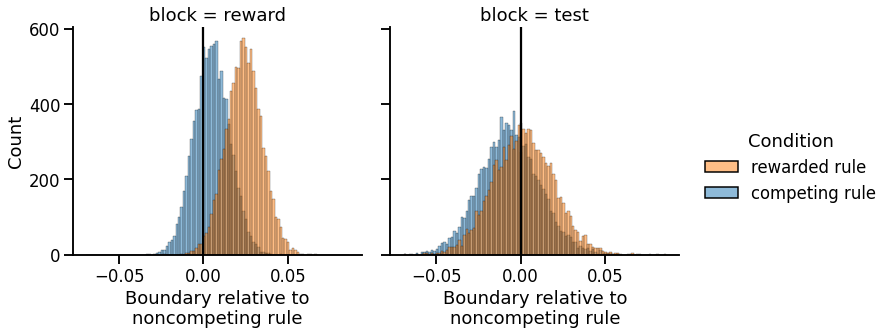

In [19]:
fig_df = traces[traces.Parameter == 'Boundary']
fig_df['Boundary relative to\nnoncompeting rule'] = fig_df['Posterior Samples']
grid = sns.displot(x = 'Boundary relative to\nnoncompeting rule',
           hue = 'Condition',
            kind = 'hist',
            palette = [sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
            col = 'block',
            data = fig_df)

for ax in grid.axes.flat:
    ax.axvline(0,
              color = 'black')
    
plt.savefig(op.abspath('./paper/figs/boundaries.png'),
            bbox_inches = 'tight',
            dpi = 300)

In [71]:
fig_df = traces[traces.Parameter == 'Boundary']

a = fig_df[fig_df.block == 'reward']
compete = a.loc[a.variable == 'a_compete','Posterior Samples'].values
reward = a.loc[a.variable == 'a_rewarded','Posterior Samples'].values
print('compete',sum(compete < 0) / len(compete),arviz.hdi(compete, .89))
print('reward',sum(reward > 0) / len(reward),arviz.hdi(reward, .89))
print('reward - compete',sum(reward - compete > 0) / len(reward),arviz.hdi(reward - compete, .89))


compete 0.3177 [-0.0116666   0.02170877]
reward 0.988 [0.00609291 0.03996617]
reward - compete 0.9574 [0.00109342 0.0363849 ]


In [100]:
fig_df = traces[traces.Parameter == 'Boundary']

a = fig_df[fig_df.block == 'test']
compete = a.loc[a.variable == 'a_compete','Posterior Samples'].values
reward = a.loc[a.variable == 'a_rewarded','Posterior Samples'].values
print('compete',sum(compete < 0) / len(compete),arviz.hdi(compete, .89))
print('reward',sum(reward > 0) / len(reward),arviz.hdi(reward, .89))
print('reward - compete',sum(reward - compete > 0) / len(reward),arviz.hdi(reward - compete, .89))


compete 0.6563 [-0.03463776  0.02128733]
reward 0.5369 [-0.02643509  0.02973926]
reward - compete 0.6795 [-0.02076777  0.03565159]


In [98]:
fig_df = traces[traces.Parameter == 'Boundary']

fig_df = fig_df[fig_df.Condition == 'rewarded rule']

reward_boundary = fig_df.loc[fig_df['block'] == 'reward','Posterior Samples'].values
test_boundary = fig_df.loc[fig_df['block'] == 'test','Posterior Samples'].values
sum(reward_boundary - test_boundary > 0)/len(reward_boundary) 

0.8607

In [99]:
fig_df = traces[traces.Parameter == 'Boundary']

fig_df = fig_df[fig_df.Condition == 'competing rule']

reward_boundary = fig_df.loc[fig_df['block'] == 'reward','Posterior Samples'].values
test_boundary = fig_df.loc[fig_df['block'] == 'test','Posterior Samples'].values
sum(reward_boundary - test_boundary > 0)/len(reward_boundary) 

0.7185

In [137]:
# arviz.hdi(reward_boundary, .89)
arviz.hdi(reward_boundary - test_boundary, .89)

array([-0.01198302,  0.05408835])

In [101]:
fig_df = traces[traces.Parameter == 'Boundary']
a = fig_df[fig_df.block == 'test']
a = a[a.Parameter == 'Boundary']
reward = a.loc[a.Condition == 'rewarded rule','Posterior Samples'].values
compete = a.loc[a.Condition == 'competing rule','Posterior Samples'].values
diff_test = reward - compete

a = fig_df[fig_df.block == 'reward']
a = a[a.Parameter == 'Boundary']
reward = a.loc[a.Condition == 'rewarded rule','Posterior Samples'].values
compete = a.loc[a.Condition == 'competing rule','Posterior Samples'].values
diff_reward = reward - compete

interaction = diff_reward - diff_test
sum(interaction > 0)/len(interaction)

0.6984

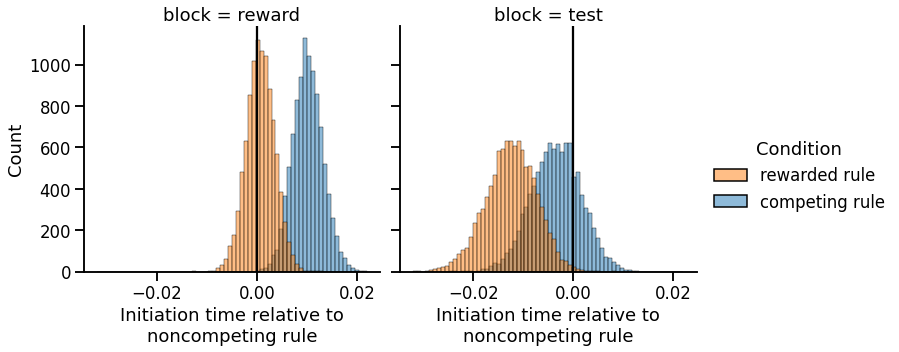

In [113]:
fig_df = traces[traces.Parameter == 'Nondecision Time']
fig_df['Initiation time relative to\nnoncompeting rule'] = fig_df['Posterior Samples']
grid = sns.displot(x = 'Initiation time relative to\nnoncompeting rule',
           hue = 'Condition',
            kind = 'hist',
            col = 'block',
            palette = [sns.color_palette(as_cmap = True)[1],
                   sns.color_palette(as_cmap = True)[0]],
            data = fig_df)

for ax in grid.axes.flat:
    ax.axvline(0,
              color = 'black')
    
# plt.savefig(op.abspath('./paper/figs/nondecisoin_time.png'),
#             bbox_inches = 'tight',
#             dpi = 300)

In [94]:
fig_df = traces[traces.Parameter == 'Nondecision Time']

a = fig_df[fig_df.block == 'reward']
compete = a.loc[a.variable == 't_compete','Posterior Samples'].values
reward = a.loc[a.variable == 't_rewarded','Posterior Samples'].values
print('compete',sum(compete > 0) / len(compete),arviz.hdi(compete, .89))
print('reward',sum(reward < 0) / len(reward),arviz.hdi(reward, .89))
print('reward - compete',sum(reward - compete < 0) / len(reward),arviz.hdi(reward - compete, .89))


compete 0.9999 [0.00520616 0.01471017]
reward 0.406 [-0.00364241  0.00533232]
reward - compete 0.998 [-0.01474359 -0.00418269]


In [137]:
fig_df = traces[traces.Parameter == 'Nondecision Time']

a = fig_df[fig_df.block == 'test']
compete = a.loc[a.variable == 't_compete','Posterior Samples'].values
reward = a.loc[a.variable == 't_rewarded','Posterior Samples'].values
print('compete',sum(compete < 0) / len(compete),arviz.hdi(compete, .89))
print('reward',sum(reward < 0) / len(reward),arviz.hdi(reward, .89))
print('reward - compete',sum(reward - compete < 0) / len(reward),arviz.hdi(reward - compete, .89))


compete 0.7519 [-0.01104757  0.0046424 ]
reward 0.996 [-0.02023357 -0.00447694]
reward - compete 0.9816 [-0.01616965 -0.00188912]


In [92]:
fig_df = traces[traces.Parameter == 'Nondecision Time']

fig_df = fig_df[fig_df.Condition == 'competing rule']

reward_boundary = fig_df.loc[fig_df['block'] == 'reward','Posterior Samples'].values
test_boundary = fig_df.loc[fig_df['block'] == 'test','Posterior Samples'].values
print('block_comparison',sum(reward_boundary - test_boundary > 0)/len(reward_boundary), arviz.hdi(reward_boundary - test_boundary, .89))

block_comparison 0.9938 [0.00423057 0.02275184]


In [93]:
fig_df = traces[traces.Parameter == 'Nondecision Time']

fig_df = fig_df[fig_df.Condition == 'rewarded rule']

reward_boundary = fig_df.loc[fig_df['block'] == 'reward','Posterior Samples'].values
test_boundary = fig_df.loc[fig_df['block'] == 'test','Posterior Samples'].values
print('block_comparison',sum(reward_boundary - test_boundary > 0)/len(reward_boundary), arviz.hdi(reward_boundary - test_boundary, .89))

block_comparison 0.9914 [0.00414227 0.0223979 ]
